### import Librairie

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

### import dataset

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### info dataset

In [3]:
df.shape

(400, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
# nombre de features par colonne
df.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

### Valeur null ou pas 

In [7]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### creation fonction get_dummies pour gestion colonne quantitative, qualitative.

In [8]:
def dummies(dataset, column):
    dummies = pd.get_dummies(dataset[column],prefix=column)
    dataset = pd.concat([dataset,dummies],axis=1)
    return dataset

### Application get_dummies sur notre dataset

In [9]:
social_df=dummies(df,'Gender')
# verification
social_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
 5   Gender_Female    400 non-null    uint8 
 6   Gender_Male      400 non-null    uint8 
dtypes: int64(4), object(1), uint8(2)
memory usage: 16.5+ KB


### drop des colonnes

In [10]:
df=social_df.drop(['User ID','Gender','Gender_Female'], axis=1)
#vérif
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


### Création Cible

In [12]:
y=df['Purchased']
X=df.drop('Purchased',1)

### split du dataset pour training

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

### Arbres de decision

In [14]:
from IPython.display import display
from pprint import pprint

### Creation fonction arbre de décision pour classification

In [15]:
def modelTree(X_train,y_train,X_test,y_test):
    # arbre de decision classification
    clf = DecisionTreeClassifier(random_state=0)
    # training dataset
    clf = clf.fit(X_train,y_train)
    print("max_depth ",clf.tree_.max_depth)
    print("max_features ",clf.max_features_,'\n')
    
    print('The parametres the model used:\n')
    pprint(clf.get_params())
    # parqu'un petit grahp ca fait toujours plaisir
    y_pred = clf.predict(X_test)
    # evalutation model
    model=EvaluateModelRegression(clf,X_test,y_test, y_pred)
    
    return model

### Creation fonction évalutation modéle

In [16]:
def EvaluateModelRegression(model,X_test,y_test, y_predict):
    accuracy=accuracy_score(y_test, y_predict)
    print('\n','\033[1m' + 'Accuracy score: '+'\033[0m',accuracy) # le plus important pour le moment; précisément la première ligne
    fig = plt.figure()
    # Matrice de confusion
    ax= plt.subplot()
    sns.heatmap(confusion_matrix(y_test,y_predict), annot=True, ax = ax ,fmt='g'); #annot=True to annotate cells
    ax.set_xlabel('Valeurs prédites');ax.set_ylabel('Valeurs réelles'); 
    ax.set_title('Confusion Matrix'); 
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    ax.xaxis.set_ticklabels(['Not purchased', 'Purchased']); ax.yaxis.set_ticklabels(['Not purchased', 'Purchased']);
    
    return model,accuracy

### import librairie pour Viz

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets
from IPython.display import Image  
from sklearn.externals.six import StringIO 
# pour un jolie arbre sur note book
%matplotlib inline
import graphviz 
from sklearn import tree
from sklearn.tree import export_graphviz

E:\systeme\anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


### Arbre de classification profondeur, features ect.... avec graphe de corelation

max_depth  11
max_features  3 

The parametres the model used:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

 Accuracy score:  0.8833333333333333


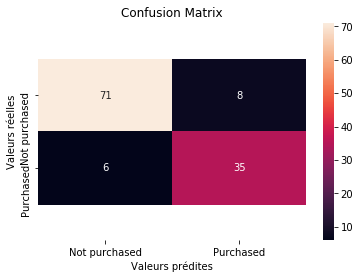

In [18]:
model1,accuracy1= modelTree(X_train,y_train,X_test,y_test)

### import viz

In [19]:
import pydot 

### Viz arbres

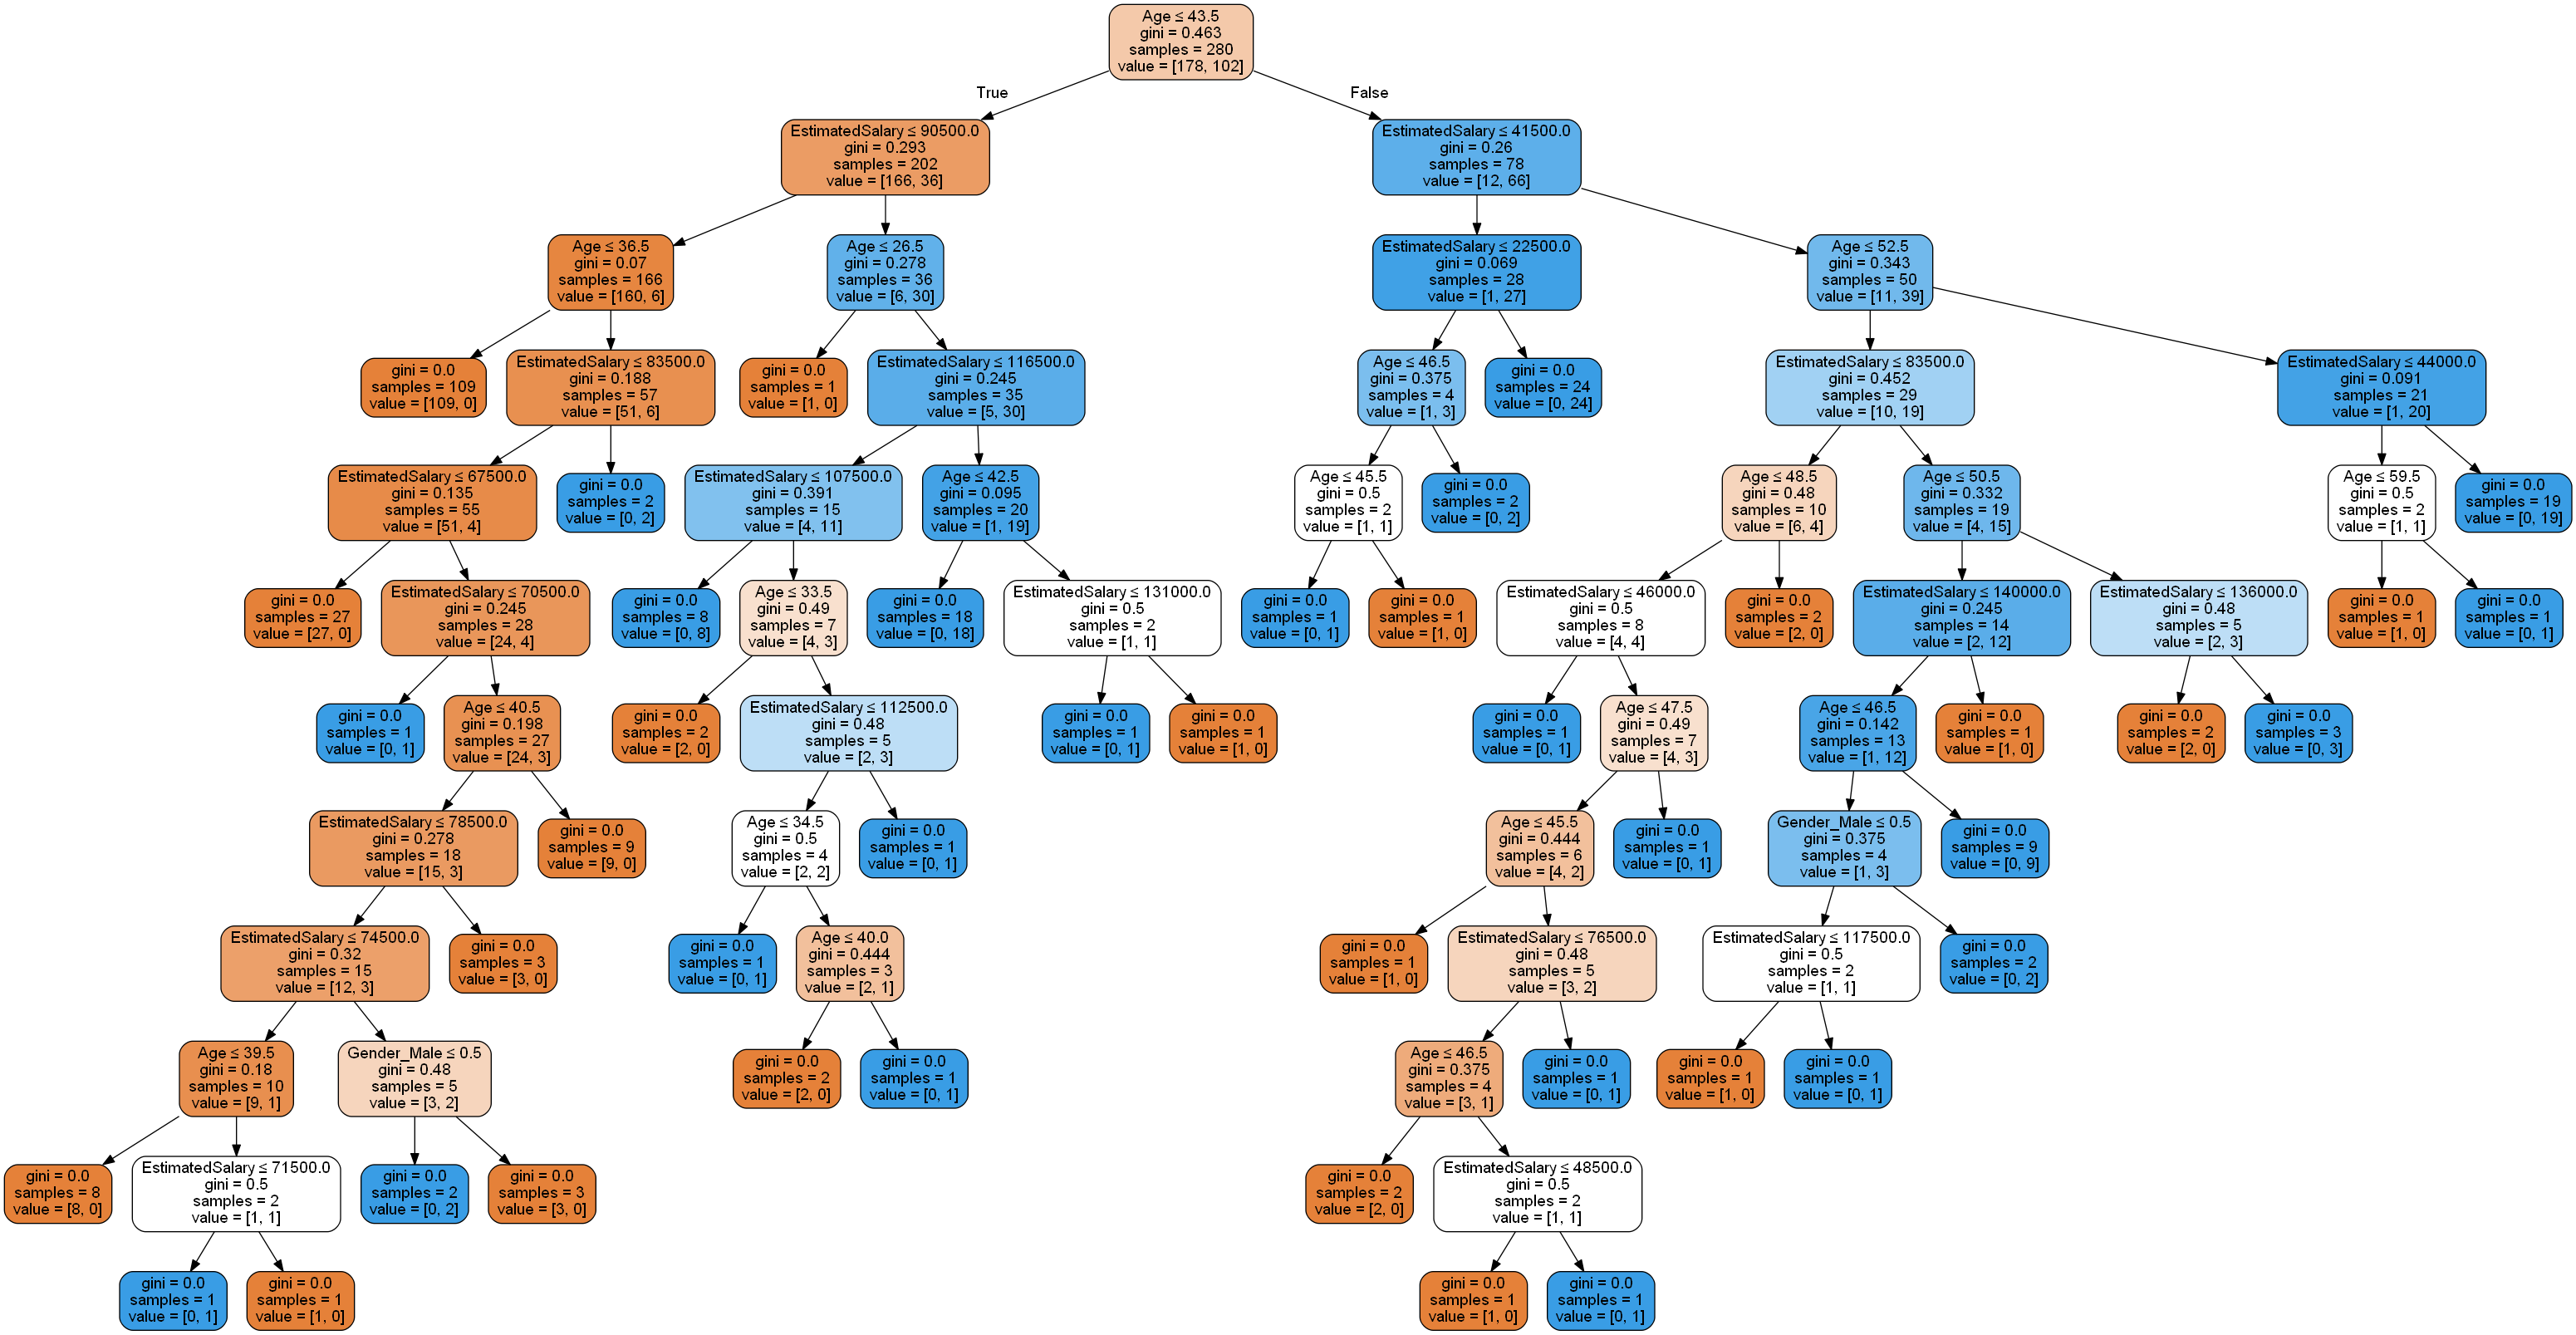

In [20]:
dot_data = StringIO()  
tree.export_graphviz(model1, out_file=dot_data,  
    filled=True, rounded=True,
    feature_names=X_train.columns,
    special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())